In [6]:
from manim import *
import geopandas as gpd

# import point 



ModuleNotFoundError: No module named 'manim'

ai/               Climt1-70214.out  Climt1-70606.out  Climt1-70660.out
Climt1-70040.err  Climt1-70215.err  Climt1-70607.err  Climt1-70661.err
Climt1-70040.out  Climt1-70215.out  Climt1-70607.out  Climt1-70661.out
Climt1-70041.err  Climt1-70216.err  Climt1-70608.err  Climt1-70662.err
Climt1-70041.out  Climt1-70216.out  Climt1-70608.out  Climt1-70662.out
Climt1-70043.err  Climt1-70217.err  Climt1-70609.err  Climt1-70663.err
Climt1-70043.out  Climt1-70217.out  Climt1-70609.out  Climt1-70663.out
Climt1-70044.err  Climt1-70218.err  Climt1-70610.err  Climt1-70664.err
Climt1-70044.out  Climt1-70218.out  Climt1-70610.out  Climt1-70664.out
Climt1-70045.err  Climt1-70219.err  Climt1-70611.err  Climt1-70665.err
Climt1-70045.out  Climt1-70219.out  Climt1-70611.out  Climt1-70665.out
Climt1-70046.err  Climt1-70220.err  Climt1-70612.err  Climt1-70666.err
Climt1-70046.out  Climt1-70220.out  Climt1-70612.out  Climt1-70666.out
Climt1-70047.err  Climt1-70221.err  Climt1-70613.err  Climt1-70667.err
Climt1

In [ ]:
world = gpd.read_file('/Users/nalex2023/Downloads/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

exploded_fl = world[world['name']=='Florida'].explode()

exploded_fl['part'] = [f'part_{i}' for i in range(len(exploded_fl))]

polygon = exploded_fl[exploded_fl['part']=='part_0'].geometry.values[0]

polygon_border_xy = np.array(polygon.boundary.coords)


latm , lonm = 28.5, -80.6

point_coords = np.array([lon, lat])
# Create a point


milton = gpd.read_file('/Users/nalex2023/Downloads/al142024_5day_latest/al142024-005A_5day_pts.shp')

lat = []
lon = []
time = []
for ii in range(len(milton)):
    
    lat += [milton['LAT'][ii]]
    lon += [milton['LON'][ii]]
    time += [milton['DATELBL'][ii]]

lat = np.array(lat)
lon = np.array(lon)


# create a line polygon from the lat and lon

line_track = np.array([lon, lat]).T





class Animate(Scene):
   def construct(self):
        # set up Manim Axis
        axes = Axes(
            x_range=[min(polygon_border_xy[:,0])-2.5, max(polygon_border_xy[:,0])+2.5],
            y_range=[min(polygon_border_xy[:,1]), max(polygon_border_xy[:,1])],
            axis_config={"color": BLUE},
        )
        
        boundary_line = axes.plot_line_graph(polygon_border_xy[:,0], polygon_border_xy[:,1], 
                                       add_vertex_dots=False, 
                                       line_color=WHITE,
                                       stroke_width=5 )
        
        mlb_coords = axes.coords_to_point(lonm, latm)
        
        point_mlb = Dot(mlb_coords, color=RED)

        points_cyc = []
        for i in range(len(lat)):
            points_cyc.append(axes.coords_to_point(lon[i], lat[i]))
        
        dots_cyc = [Dot(x, color=GREEN) for x in points_cyc]

        texts = [Text(f'{time[i]}',color='green',font_size=12).next_to(dots_cyc[i], direction=RIGHT) for i in range(len(time))]


        # add text next to point
        text = Text(f'MLB').next_to(point_mlb, direction=RIGHT)

#         bd_line.move_to(LEFT*3)
        self.play( Create(boundary_line, run_time=2))
        self.play(FadeIn(point_mlb))
        self.play(Write(text))
        for dot in dots_cyc:
            self.play(FadeIn(dot))
        for txt in texts:
            self.play(Write(txt))
        self.wait(1)




Animate().render()

In [ ]:
import geopandas as gpd
import numpy as np
from manim import *

# Load the shapefile
world = gpd.read_file('/Users/nalex2023/Downloads/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')

# Extract and explode the geometry for Florida
exploded_fl = world[world['name'] == 'Florida'].explode()
exploded_fl['part'] = [f'part_{i}' for i in range(len(exploded_fl))]
polygon = exploded_fl[exploded_fl['part'] == 'part_0'].geometry.values[0]
polygon_border_xy = np.array(polygon.boundary.coords)

# Load the hurricane track data

milton = gpd.read_file('/Users/nalex2023/Downloads/al142024_5day_latest/al142024-005A_5day_pts.shp')

latm = 28.5
lonm = -80.6


lat = []
lon = []
eta = []
for ii in range(len(milton)):
    lat += [milton['LAT'][ii]]
    lon += [milton['LON'][ii]]
    eta += [milton['DATELBL'][ii]]

class Animate(Scene):
    def construct(self):
        # Set up Manim Axis
        axes = Axes(
            x_range=[min(polygon_border_xy[:, 0]) - 2.5, max(polygon_border_xy[:, 0]) + 2.5],
            y_range=[min(polygon_border_xy[:, 1]), max(polygon_border_xy[:, 1])],
            axis_config={"color": BLUE},
        )
        
        boundary_line = axes.plot_line_graph(
            polygon_border_xy[:, 0], polygon_border_xy[:, 1], 
            add_vertex_dots=False, 
            line_color=WHITE,
            stroke_width=5
        )
        
        mlb_coords = axes.coords_to_point(lonm, latm)
        point_mlb = Dot(mlb_coords, color=RED)

        points_cyc = []
        for i in range(len(lat)):
            points_cyc.append(axes.coords_to_point(lon[i], lat[i]))
        
        dots_cyc = [Dot(x, color=GREEN) for x in points_cyc]

        # Add text next to point
        text = Text(f'MLB').next_to(point_mlb, direction=RIGHT)

        text_eta = [Text(f'{eta[i]}', color='green', font_size=12).next_to(dots_cyc[i], direction=RIGHT) for i in range(len(eta))]

        # Define the vector field function
        func = lambda pos: np.sin(pos[1]) * RIGHT + np.cos(pos[0]) * UP
        vector_field = ArrowVectorField(func)

        # Add boundary line, points, and vector field to the scene
        self.play(Create(boundary_line, run_time=2))
        self.play(FadeIn(point_mlb))
        self.play(Write(text))
        for dot in dots_cyc:
            self.play(FadeIn(dot))
        
        for txt in text_eta:
            self.play(Write(txt))

        self.add(vector_field)
        self.wait(1)

        # Scale the vector field function
        scaled_func = VectorField.scale_func(func, 0.5)
        self.play(vector_field.animate.become(ArrowVectorField(scaled_func)))
        self.wait(1)

# Uncomment the following line to render the animation
Animate().render()

In [7]:
import xarray as xr
import glob
import numpy as np
import pandas as pd
dset = '/Users/nalex2023/Temp/era_forecasts/20241006060000-102h-oper-fc.grib2'

files = glob.glob('/Users/nalex2023/Temp/era_forecasts/*.grib2')




ds = xr.open_mfdataset(files[:10],engine='cfgrib',concat_dim='forecast_time',combine='nested', preprocess=preprocess,
                       parallel=True)

#test = xr.open_dataset(dset,engine='cfgrib')

#dd = preprocess(test)




NameError: name 'preprocess' is not defined

In [46]:
ds['sp']=ds['sp']/100


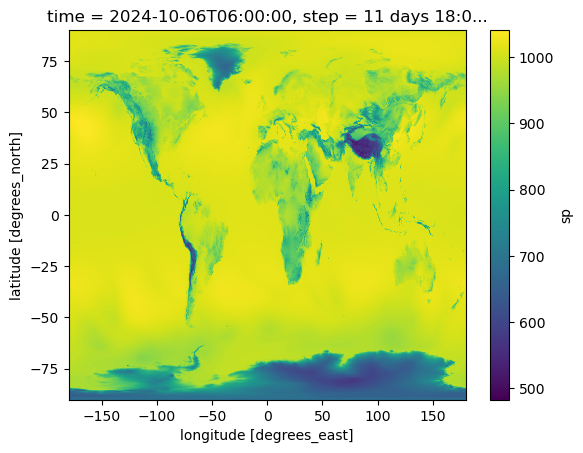

In [50]:
ds['sp'].isel(forecast_time=0).plot()

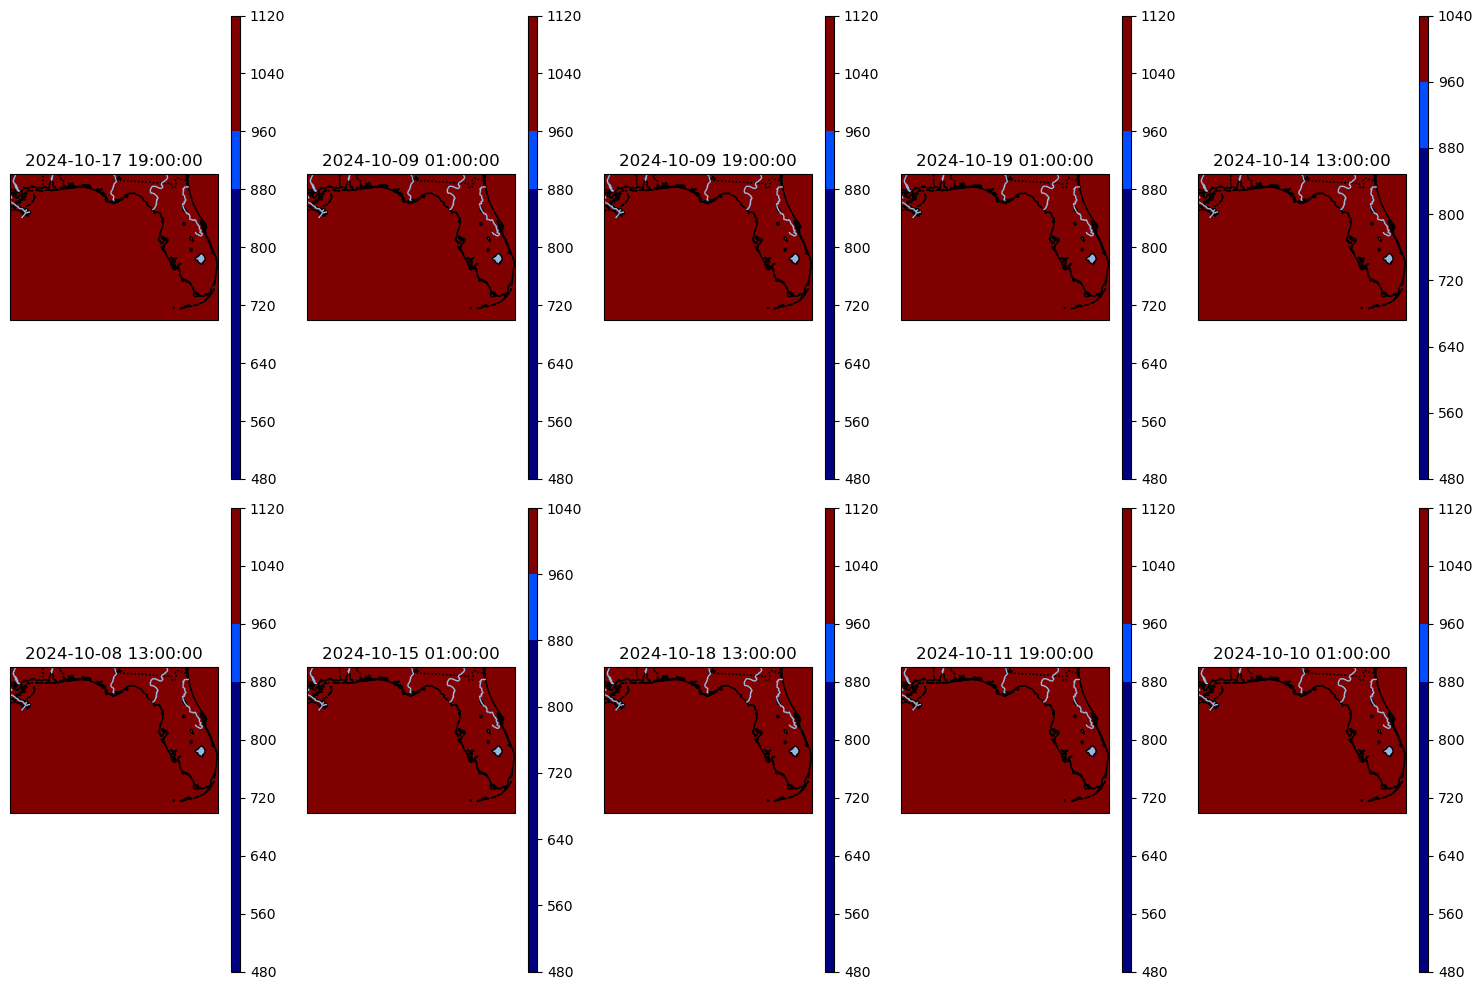

In [51]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

# facet plot with cartopy


# facet plot



<xarray.Dataset>
Dimensions:     (latitude: 801, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 13.85 13.87 13.89 13.91 ... 29.81 29.83 29.85
  * longitude   (longitude) float64 257.8 257.8 257.8 ... 277.8 277.8 277.8
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
    mslet       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-10-06T16:37 GRIB to CDM+CF via cfgrib-0.9.1...

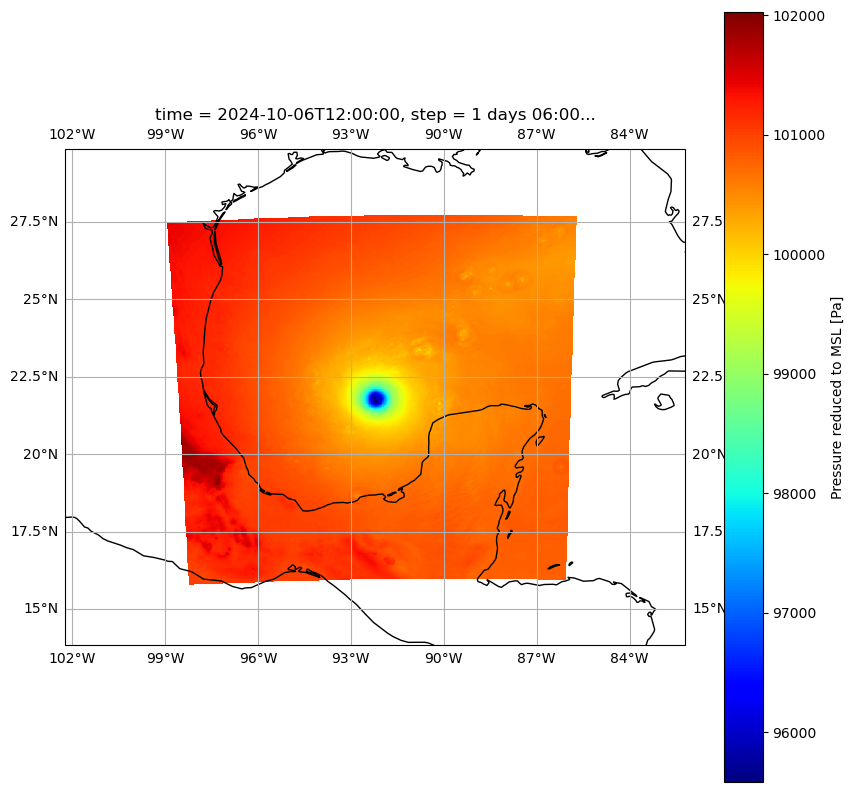

In [87]:
ds = xr.open_dataset('/Users/nalex2023/Downloads/14l.2024100612.hfsb.storm.atm.f030.grb2',engine='cfgrib',filter_by_keys={'typeOfLevel': 'meanSea'})


fig,ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ds.prmsl.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='jet')
ax.gridlines(draw_labels=True)

ds

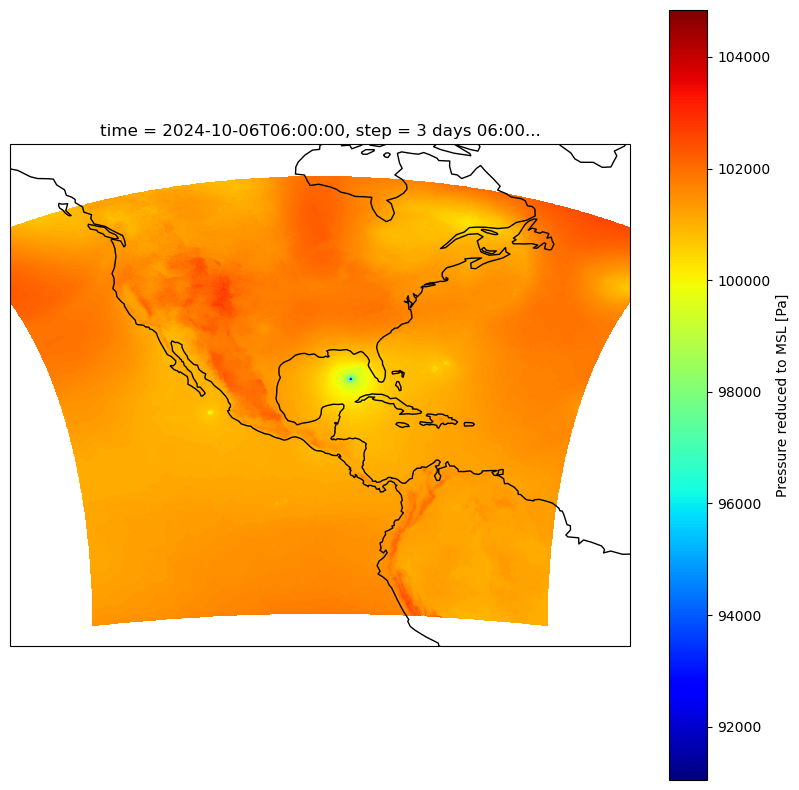

In [81]:
ds = xr.open_dataset('/Users/nalex2023/Downloads/14l.2024100606.hfsa.parent.atm.f078.grb2',engine='cfgrib',filter_by_keys={'typeOfLevel': 'meanSea'})
fig,ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ds.prmsl.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='jet')


In [153]:
from datetime import datetime
from datetime import timezone 
name = '14l.'
dt_prefix = datetime.now().strftime('%Y%m%d')

def get_init_time():
    utc_time = datetime.now(timezone.utc) - pd.Timedelta(hours=5)
    if 0 <= utc_time.hour < 6:
        init_time = '00'
    elif 6 <= utc_time.hour < 12:
        init_time = '06'
    elif 12 <= utc_time.hour < 18:
        init_time = '12'
    else:
        init_time = '18'
  
    return init_time

dt_final = dt_prefix + get_init_time()



dft = pd.DataFrame(data=[name]*20,columns=['name'])

dft['dt'] = dt_final

dft['forecast_hour'] = np.arange(0,3*20,3)

dft['prefix'] = '.hfsb.storm.atm.'

dft['utc_time'] = pd.to_datetime(dft['dt'],format='%Y%m%d%H') + pd.to_timedelta(dft['forecast_hour'],unit='h')

dft['local_time'] = dft['utc_time'] - pd.Timedelta(hours=5,minutes=0)

dft['filename'] = dft['name'] + dft['dt'] + dft['prefix'] + 'f' +dft['forecast_hour'].astype(str).str.zfill(3) + '.grb2'

#dft['forecast_hour'].astype(str).str.zfill(3)

stats_file = f'{name}{dt_final}.hfsb.grib.stats.short'

# add the stats file the column filename while all other columns are the same
dft.loc[0,'filename'] = stats_file

dft


,name,dt,forecast_hour,prefix,utc_time,local_time,filename
0,14l.,2024100612,0,.hfsb.storm.atm.,2024-10-06 12:00:00,2024-10-06 07:00:00,14l.2024100612.hfsb.grib.stats.short
1,14l.,2024100612,3,.hfsb.storm.atm.,2024-10-06 15:00:00,2024-10-06 10:00:00,14l.2024100612.hfsb.storm.atm.f003.grb2
2,14l.,2024100612,6,.hfsb.storm.atm.,2024-10-06 18:00:00,2024-10-06 13:00:00,14l.2024100612.hfsb.storm.atm.f006.grb2
3,14l.,2024100612,9,.hfsb.storm.atm.,2024-10-06 21:00:00,2024-10-06 16:00:00,14l.2024100612.hfsb.storm.atm.f009.grb2
4,14l.,2024100612,12,.hfsb.storm.atm.,2024-10-07 00:00:00,2024-10-06 19:00:00,14l.2024100612.hfsb.storm.atm.f012.grb2
5,14l.,2024100612,15,.hfsb.storm.atm.,2024-10-07 03:00:00,2024-10-06 22:00:00,14l.2024100612.hfsb.storm.atm.f015.grb2
6,14l.,2024100612,18,.hfsb.storm.atm.,2024-10-07 06:00:00,2024-10-07 01:00:00,14l.2024100612.hfsb.storm.atm.f018.grb2
7,14l.,2024100612,21,.hfsb.storm.atm.,2024-10-07 09:00:00,2024-10-07 04:00:00,14l.2024100612.hfsb.storm.atm.f021.grb2
8,14l.,2024100612,24,.hfsb.storm.atm.,2024-10-07 12:00:00,2024-10-07 07:00:00,14l.2024100612.hfsb.storm.atm.f024.grb2
9,14l.,2024100612,27,.hfsb.storm.atm.,2024-10-07 15:00:00,2024-10-07 10:00:00,14l.2024100612.hfsb.storm.atm.f027.grb2


In [154]:
# download the files from aws cli
"""
aws s3 ls --no-sign-request s3://noaa-nws-hafs-pds/hfsb/20241006/12/


"""
import os
import subprocess



# just one file with no-sign-request

#subprocess.run(['aws','s3','cp', '--no-sign-request' ,f's3://noaa-nws-hafs-pds/{prefix_dir}','/Users/nalex2023/temp/'],check=True)

outfol = '/Users/nalex2023/Temp/cyclone_dsets/'

fol_name = f'{name}{dt_final}'

os.makedirs(outfol+fol_name,exist_ok=True)

for i in range(len(dft)):
    subprocess.run(['aws','s3','cp', '--no-sign-request' ,f's3://noaa-nws-hafs-pds/hfsb/20241006/12/{dft.loc[i,"filename"]}',outfol+fol_name],check=True)





download: s3://noaa-nws-hafs-pds/hfsb/20241006/12/14l.2024100612.hfsb.grib.stats.short to ../../../Temp/cyclone_dsets/14l.2024100612/14l.2024100612.hfsb.grib.stats.short
download: s3://noaa-nws-hafs-pds/hfsb/20241006/12/14l.2024100612.hfsb.storm.atm.f003.grb2 to ../../../Temp/cyclone_dsets/14l.2024100612/14l.2024100612.hfsb.storm.atm.f003.grb2
download: s3://noaa-nws-hafs-pds/hfsb/20241006/12/14l.2024100612.hfsb.storm.atm.f006.grb2 to ../../../Temp/cyclone_dsets/14l.2024100612/14l.2024100612.hfsb.storm.atm.f006.grb2
download: s3://noaa-nws-hafs-pds/hfsb/20241006/12/14l.2024100612.hfsb.storm.atm.f009.grb2 to ../../../Temp/cyclone_dsets/14l.2024100612/14l.2024100612.hfsb.storm.atm.f009.grb2
download: s3://noaa-nws-hafs-pds/hfsb/20241006/12/14l.2024100612.hfsb.storm.atm.f012.grb2 to ../../../Temp/cyclone_dsets/14l.2024100612/14l.2024100612.hfsb.storm.atm.f012.grb2
download: s3://noaa-nws-hafs-pds/hfsb/20241006/12/14l.2024100612.hfsb.storm.atm.f015.grb2 to ../../../Temp/cyclone_dsets/14l.2

In [41]:

import glob 
files = glob.glob('/Users/nalex2023/Temp/cyclone_dsets/14l.2024100612/*.grb2')

def prepro(ds):
    new_lats = np.arange(90,-90,-0.1)
    new_lons = np.arange(0,360,0.1)
    ds_new = ds.interp(latitude=new_lats,longitude=new_lons)
    return ds_new


ds = xr.open_mfdataset(files,engine='cfgrib',filter_by_keys={'typeOfLevel': 'meanSea'},preprocess=prepro,combine='nested',concat_dim='forecast_time',parallel=True).sortby('valid_time')
"""
fig,ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

ds['prmsl'] = ds['prmsl']/100
ds.prmsl.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='jet',robust=True)
#ds.mslet.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='jet')
"""

/Users/nalex2023/miniconda3/envs/nma/lib/python3.12/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/Users/nalex2023/miniconda3/envs/nma/lib/python3.12/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


"\nfig,ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})\nax.coastlines()\n\nds['prmsl'] = ds['prmsl']/100\nds.prmsl.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='jet',robust=True)\n#ds.mslet.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='jet')\n"

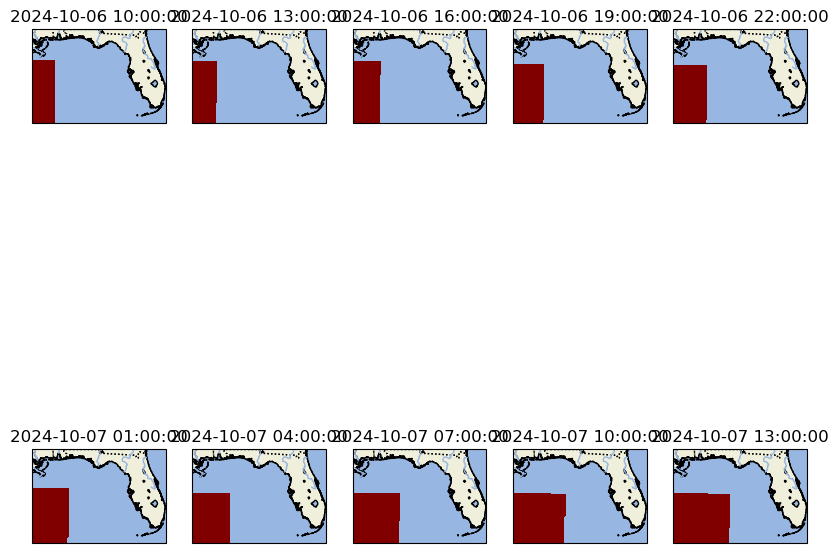

In [44]:

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_map(ax, data):
    lon = data.longitude.values
    lat = data.latitude.values
    # set florida extent
    ax.set_extent([-90, -80, 24, 31], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)
    
    cf = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(),vmin=900, vmax=1000,cmap='jet')

    time = data.valid_time.values
    # utc to local time
    time = pd.to_datetime(time) - pd.Timedelta(hours=5)
    ax.set_title(time)
    #plt.colorbar(cf, ax=ax, orientation='vertical', pad=0.05, aspect=50)
    
    return ax



fig, axes = plt.subplots(2, 5, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})


for i, ax in enumerate(axes.flat):
    plot_map(ax, ds['prmsl'].isel(forecast_time=i))


In [46]:
# plot using plotly


In [183]:

ds.to_netcdf('/Users/nalex2023/Temp/cyclone_dsets/test.nc')

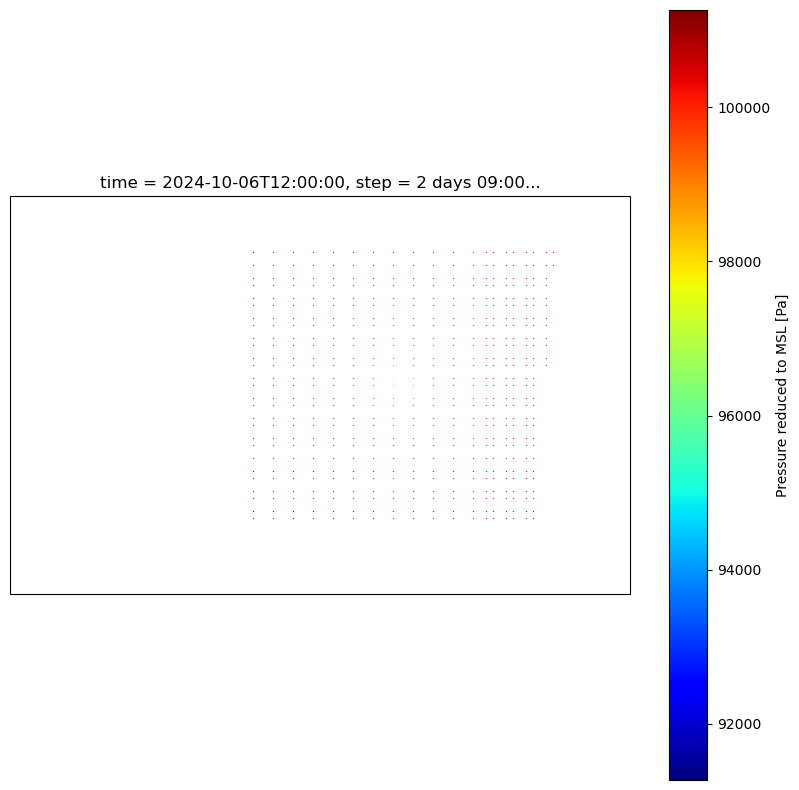

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

test = xr.open_dataset('/Users/nalex2023/Temp/cyclone_dsets/test.nc')

test['longitude'] = test['longitude'] - 360

fig,ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})



{'GRIB_edition': 2,
 'GRIB_centre': 'kwbc',
 'GRIB_centreDescription': 'US National Weather Service - NCEP',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'US National Weather Service - NCEP',
 'history': '2024-10-06T17:14 GRIB to CDM+CF via cfgrib-0.9.10.4/ecCodes-2.38.0 with {"source": "../../../Downloads/14l.2024100612.hfsb.storm.atm.f000.grb2", "filter_by_keys": {"typeOfLevel": "meanSea"}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}